In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
print("현재 작업 경로: ", os.getcwd())
os.chdir("/content/drive/MyDrive")
print("변경된 작업 경로: ", os.getcwd())
_FONT_SIZE = 20

현재 작업 경로:  /content
변경된 작업 경로:  /content/drive/MyDrive


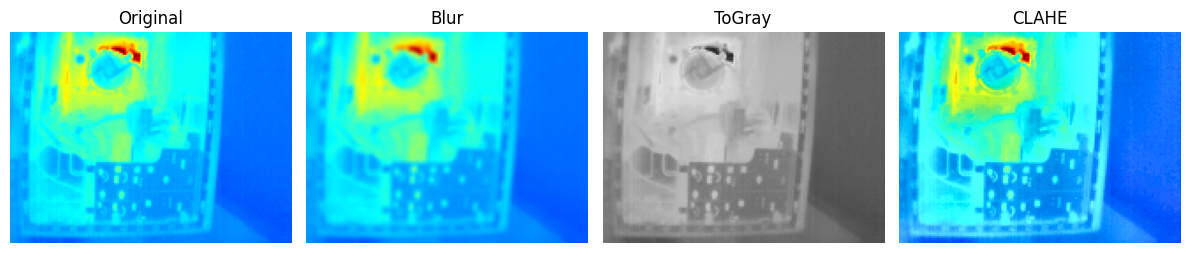

True

In [ ]:
import cv2
import albumentations as A
from albumentations import Blur, ToGray, CLAHE
import matplotlib.pyplot as plt

# 이미지 불러오기
img_path = "/content/drive/MyDrive/yolo11_test/capstone_dataset/train/images/2025-04-30 14_38_52 min_20.25 max_59.93.png"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform_blur = A.Blur(p=1.0, blur_limit=(3, 7))
transform_gray = A.ToGray(p=1.0, num_output_channels=3)
transform_clahe = A.CLAHE(p=1.0, clip_limit=(2.0, 4.0), tile_grid_size=(8, 8))

# 각각 전처리 적용
blur_img = transform_blur(image=image)['image']
gray_img = transform_gray(image=image)['image']
clahe_img = transform_clahe(image=image)['image']


# 시각화
titles = ['Original', 'Blur', 'ToGray', 'CLAHE']
images = [image, blur_img, gray_img, clahe_img]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 저장
cv2.imwrite("/content/blur_image.jpg", cv2.cvtColor(blur_img, cv2.COLOR_RGB2BGR))
cv2.imwrite("/content/gray_image.jpg", cv2.cvtColor(gray_img, cv2.COLOR_RGB2BGR))
cv2.imwrite("/content/clahe_image.jpg", cv2.cvtColor(clahe_img, cv2.COLOR_RGB2BGR))



In [ ]:
def get_temp_from_bgr(bgr):
    i = lut_map.get(tuple(int(v) for v in bgr), None)
    if i is not None:
        return i / 255.0 * (60 - 10) + 10
    else:
        return None  # LUT에 없으면 None 반환

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시나리오별 디렉토리 경로
# base_path = "/content/drive/MyDrive/capstone/Scenario_Dataset"
base_path = "/content/drive/MyDrive/yolo11_test/Scenario_Dataset"
scenarios = {
    "idle": "dataset_idle",
    "cpu": "dataset_cpu",
    "gpu": "dataset_gpu",
    "union": "dataset_union"
}
results = []
heatmap_data = []
gray = np.arange(256, dtype=np.uint8)
jet_lut = cv2.applyColorMap(gray, cv2.COLORMAP_JET)
lut_map = {tuple(jet_lut[i,0]): i for i in range(256)}

#온도값 계산
for scenario, folder in scenarios.items():
    temperature_list = []
    path = os.path.join(base_path, folder)
    for fname in os.listdir(path):
        if fname.endswith(".png"):
            img = cv2.imread(os.path.join(path, fname))
            height, width = img.shape[:2]
            img_value = np.zeros((height, width))
            #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            """
            hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            v_channel = hsv_image[:,:,2]
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(v_channel)


            min_x, min_y = min_loc
            max_x, max_y = max_loc

            max_temp = img[min_y, min_x]
            min_temp = img[max_y, max_x]
            max_temp = get_temp_from_bgr(max_temp)
            min_temp = get_temp_from_bgr(min_temp)
            """
            for y in range(height):
                for x in range(width):
                    bgr = img[y, x]  # 특정 위치의 BGR 값 추출
                    img_value[y, x] = get_temp_from_bgr(bgr)  # 가정: example() 함수가 정의되어 있음
            min_temp = np.min(img_value)
            max_temp = np.max(img_value)
            mean_temp = np.mean(img_value)
            std_temp = np.std(img_value)
            temperature_list.append(mean_temp)
            results.append({
                "scenario": scenario,
                "file": fname,
                "mean": mean_temp,
                "min": min_temp,
                "max": max_temp,
                "std": std_temp
            })
    heatmap_data.append(temperature_list)
df = pd.DataFrame(results)


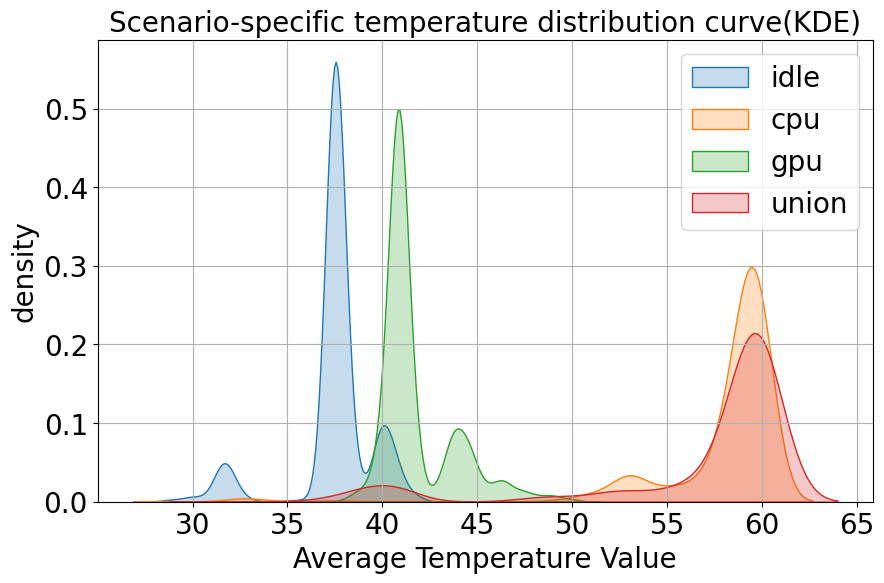

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
for scenario in scenarios:
    sns.kdeplot(df[df["scenario"] == scenario]["max"], label=scenario, fill=True)
plt.title("Scenario-specific temperature distribution curve(KDE)", fontsize=_FONT_SIZE)
plt.xlabel("Average Temperature Value", fontsize=_FONT_SIZE)
plt.ylabel("density", fontsize=_FONT_SIZE)
plt.legend(fontsize = _FONT_SIZE)
plt.xticks(fontsize=_FONT_SIZE)
plt.yticks(fontsize=_FONT_SIZE)
plt.grid(True)
plt.show()


In [ ]:
# 시나리오별 통계 요약
summary = df.groupby("scenario")["max"].agg(["mean", "std", "min", "max"]).reset_index()
summary = summary.round(0)  # 소수점 2자리로 반올림

# 결과 출력
print("시나리오별 최대 온도값 통계")
print(summary)

시나리오별 최대 온도값 통계
  scenario  mean  std   min   max
0      cpu  58.0  4.0  30.0  60.0
1      gpu  42.0  2.0  34.0  50.0
2     idle  37.0  2.0  28.0  42.0
3    union  57.0  6.0  33.0  60.0


In [ ]:
import pandas as pd

# df는 'scenario', 'mean_brightness' 컬럼이 있다고 가정
stats = df.groupby('scenario')['max'].describe().round(0)
print(stats)


           count  mean  std   min   25%   50%   75%   max
scenario                                                 
cpu       1989.0  58.0  4.0  30.0  58.0  59.0  60.0  60.0
gpu       1990.0  42.0  2.0  34.0  41.0  41.0  42.0  50.0
idle      1990.0  37.0  2.0  28.0  37.0  38.0  38.0  42.0
union     1990.0  57.0  6.0  33.0  58.0  60.0  60.0  60.0


In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

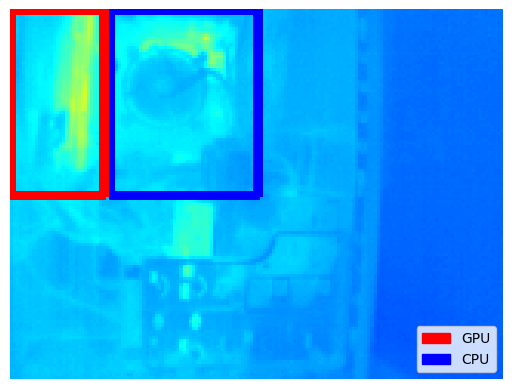

In [ ]:
img = cv2.imread("/content/drive/MyDrive/yolo11_test/Scenario_Dataset/dataset_gpu/2025-04-28 15_05_56 min_20.36 max_38.94.png")
display = img.copy()

# 사각형 그리기
cv2.rectangle(display, (32, 0), (80, 60), (255, 0, 0), 2)   # CPU: 파란색
cv2.rectangle(display, (0, 0), (30, 60), (0, 0, 255), 2)  # GPU: 빨간색

plt.imshow(cv2.cvtColor(display, cv2.COLOR_BGR2RGB))
# plt.title("CPU/GPU Area")
plt.axis("off")

# 범례 추가
blue_patch = mpatches.Patch(color='blue', label='CPU')
red_patch = mpatches.Patch(color='red', label='GPU')
plt.legend(handles=[red_patch, blue_patch], loc='lower right')  # 위치는 필요에 따라 조정

plt.show()


<ipython-input-3-aa6e834dad1f>:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("jet", n_clusters)


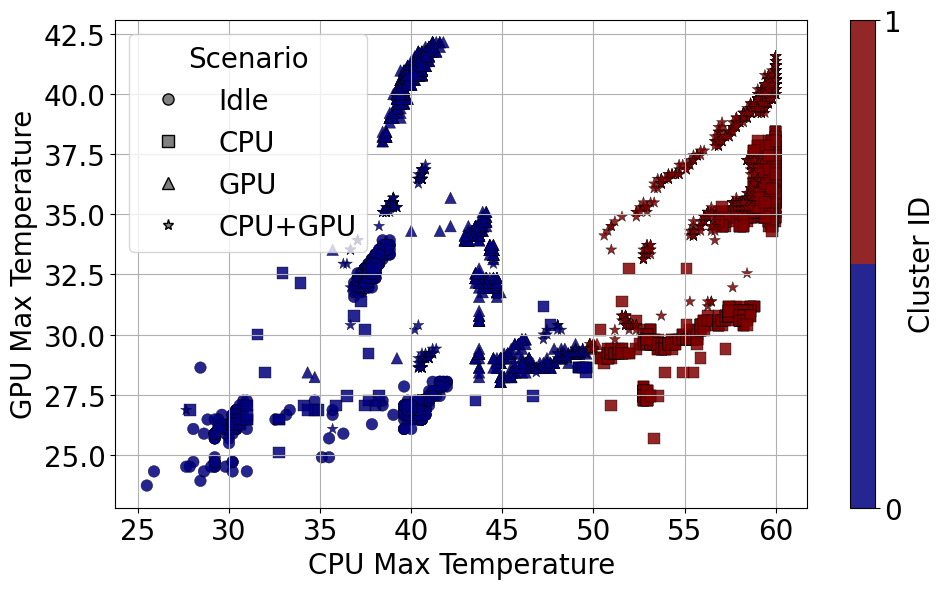

In [3]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import cm

# 시나리오별 디렉토리 경로
base_path = "/content/drive/MyDrive/yolo11_test/Scenario_Dataset"
scenarios = {
    "idle": "dataset_idle",
    "cpu": "dataset_cpu",
    "gpu": "dataset_gpu",
    "union": "dataset_union"
}

# CPU, GPU 영역 좌표
cpu_region_coords = (32, 0, 80, 60)  # (x1, y1, x2, y2)
gpu_region_coords = (0, 0, 30, 60)

results = []

# LUT 기반 BGR → 온도 매핑
gray = np.arange(256, dtype=np.uint8)
jet_lut = cv2.applyColorMap(gray, cv2.COLORMAP_JET)
lut_map = {tuple(jet_lut[i, 0]): i for i in range(256)}

def get_temp_from_bgr(bgr):
    i = lut_map.get(tuple(int(v) for v in bgr), None)
    if i is not None:
        return i / 255.0 * (60 - 10) + 10  # LUT 기준 온도 스케일 (10~60도)
    else:
        return None

# 이미지마다 온도 계산
for scenario, folder in scenarios.items():
    path = os.path.join(base_path, folder)
    for fname in os.listdir(path):
        if fname.endswith(".png"):
            img = cv2.imread(os.path.join(path, fname))

            cpu_x1, cpu_y1, cpu_x2, cpu_y2 = cpu_region_coords
            gpu_x1, gpu_y1, gpu_x2, gpu_y2 = gpu_region_coords

            cpu_region = img[cpu_y1:cpu_y2, cpu_x1:cpu_x2]
            cpu_temp = np.max([
                get_temp_from_bgr(cpu_region[y, x])
                for y in range(cpu_region.shape[0])
                for x in range(cpu_region.shape[1])
            ])

            gpu_region = img[gpu_y1:gpu_y2, gpu_x1:gpu_x2]
            gpu_temp = np.max([
                get_temp_from_bgr(gpu_region[y, x])
                for y in range(gpu_region.shape[0])
                for x in range(gpu_region.shape[1])
            ])

            results.append({
                "scenario": scenario,
                "file": fname,
                "cpu_max": cpu_temp,
                "gpu_max": gpu_temp
            })

# DataFrame으로 변환
df = pd.DataFrame(results)

# 전체 데이터 클러스터링 (통합 기준)
kmeans = KMeans(n_clusters=2, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['cpu_max', 'gpu_max']])

# 색상 및 마커 설정
n_clusters = 2
cmap = cm.get_cmap("jet", n_clusters)

scenario_markers = {
    "idle": "o", #원
    "cpu": "s", #사각형
    "gpu": "^", #삼각형
    "union": "*" #별
}

# plt.figure(figsize=(12, 8))
plt.figure(figsize=(10, 6))

for scenario, marker in scenario_markers.items():
    subset = df[df['scenario'] == scenario]
    sc = plt.scatter(
        subset['cpu_max'],
        subset['gpu_max'],
        c=subset['cluster'],
        cmap=cmap,
        marker=marker,
        edgecolor='k',
        linewidths=0.3,
        s=70,
        alpha=0.85,
        label=scenario
    )

# 컬러바
cbar = plt.colorbar(sc, ticks=range(n_clusters))
cbar.set_label("Cluster ID", fontsize=20)
cbar.ax.tick_params(labelsize=20)  # 컬러바 눈금 숫자 크기

# 시나리오 범례 (마커로 표시)
scenario_labels = {
    "idle": "Idle",
    "cpu": "CPU",
    "gpu": "GPU",
    "union": "CPU+GPU"
}

handles = [
    plt.Line2D([0], [0], marker=marker, color='w',
               label=scenario_labels[scenario],
               markerfacecolor='gray', markeredgecolor='k', markersize=8)
    for scenario, marker in scenario_markers.items()
]
plt.legend(handles=handles, title="Scenario", title_fontsize=20, fontsize=20)

# 제목 및 축 라벨 폰트 크기 설정
# plt.title("Clustered CPU and GPU Temperature Data by Scenario", fontsize=20)
plt.xlabel("CPU Max Temperature", fontsize=20)
plt.ylabel("GPU Max Temperature", fontsize=20)

# 축 눈금 폰트 크기
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-19-eda9cfa55724>:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("jet", n_clusters)


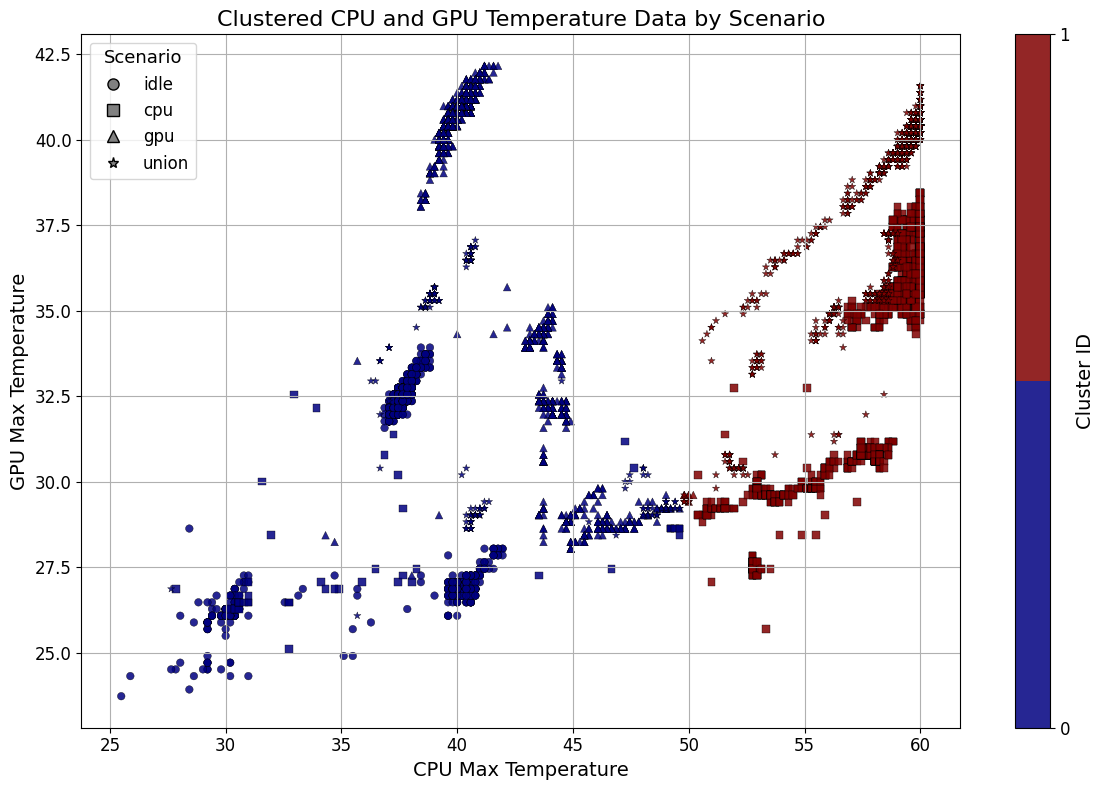

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import cm

# 시나리오별 디렉토리 경로
base_path = "/content/drive/MyDrive/yolo11_test/Scenario_Dataset"
scenarios = {
    "idle": "dataset_idle",
    "cpu": "dataset_cpu",
    "gpu": "dataset_gpu",
    "union": "dataset_union"
}

# CPU, GPU 영역 좌표
cpu_region_coords = (32, 0, 80, 60)  # (x1, y1, x2, y2)
gpu_region_coords = (0, 0, 30, 60)

results = []

# LUT 기반 BGR → 온도 매핑
gray = np.arange(256, dtype=np.uint8)
jet_lut = cv2.applyColorMap(gray, cv2.COLORMAP_JET)
lut_map = {tuple(jet_lut[i, 0]): i for i in range(256)}

def get_temp_from_bgr(bgr):
    i = lut_map.get(tuple(int(v) for v in bgr), None)
    if i is not None:
        return i / 255.0 * (60 - 10) + 10  # LUT 기준 온도 스케일 (10~60도)
    else:
        return None

# 이미지마다 온도 계산
for scenario, folder in scenarios.items():
    path = os.path.join(base_path, folder)
    for fname in os.listdir(path):
        if fname.endswith(".png"):
            img = cv2.imread(os.path.join(path, fname))

            cpu_x1, cpu_y1, cpu_x2, cpu_y2 = cpu_region_coords
            gpu_x1, gpu_y1, gpu_x2, gpu_y2 = gpu_region_coords

            cpu_region = img[cpu_y1:cpu_y2, cpu_x1:cpu_x2]
            cpu_temp = np.max([
                get_temp_from_bgr(cpu_region[y, x])
                for y in range(cpu_region.shape[0])
                for x in range(cpu_region.shape[1])
            ])

            gpu_region = img[gpu_y1:gpu_y2, gpu_x1:gpu_x2]
            gpu_temp = np.max([
                get_temp_from_bgr(gpu_region[y, x])
                for y in range(gpu_region.shape[0])
                for x in range(gpu_region.shape[1])
            ])

            results.append({
                "scenario": scenario,
                "file": fname,
                "cpu_max": cpu_temp,
                "gpu_max": gpu_temp
            })

# DataFrame으로 변환
df = pd.DataFrame(results)

# 전체 데이터 클러스터링 (통합 기준)
kmeans = KMeans(n_clusters=2, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['cpu_max', 'gpu_max']])

# 색상 및 마커 설정
n_clusters = 2
cmap = cm.get_cmap("jet", n_clusters)

scenario_markers = {
    "idle": "o",    # 원형
    "cpu": "s",     # 사각형
    "gpu": "^",     # 삼각형
    "union": "*"    # 별
}

plt.figure(figsize=(12, 8))

for scenario, marker in scenario_markers.items():
    subset = df[df['scenario'] == scenario]
    sc = plt.scatter(
        subset['cpu_max'],
        subset['gpu_max'],
        c=subset['cluster'],
        cmap=cmap,
        marker=marker,
        edgecolor='k',
        linewidths=0.3,
        s=30,
        alpha=0.85,
        label=scenario
    )

# 컬러바
cbar = plt.colorbar(sc, ticks=range(n_clusters))
cbar.set_label("Cluster ID", fontsize=14)
cbar.ax.tick_params(labelsize=12)  # 컬러바 눈금 숫자 크기

# 시나리오 범례 (마커로 표시)
handles = [
    plt.Line2D([0], [0], marker=marker, color='w', label=scenario,
               markerfacecolor='gray', markeredgecolor='k', markersize=8)
    for scenario, marker in scenario_markers.items()
]
plt.legend(handles=handles, title="Scenario", title_fontsize=13, fontsize=12)

# 제목 및 축 라벨 폰트 크기 설정
plt.title("Clustered CPU and GPU Temperature Data by Scenario", fontsize=16)
plt.xlabel("CPU Max Temperature", fontsize=14)
plt.ylabel("GPU Max Temperature", fontsize=14)

# 축 눈금 폰트 크기
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 시나리오와 클러스터 기준으로 통계 요약 생성
summary = df.groupby(['cluster', 'scenario']).agg(
    count=('cpu_max', 'count'),
    cpu_mean=('cpu_max', 'mean'),
    cpu_std=('cpu_max', 'std'),
    cpu_min=('cpu_max', 'min'),
    cpu_max=('cpu_max', 'max'),
    gpu_mean=('gpu_max', 'mean'),
    gpu_std=('gpu_max', 'std'),
    gpu_min=('gpu_max', 'min'),
    gpu_max=('gpu_max', 'max')
).reset_index()

# 보기 좋게 포맷팅
summary['cpu_temp_mean_std'] = summary.apply(
    lambda row: f"{row['cpu_mean']:.1f} ± {row['cpu_std']:.1f}", axis=1)
summary['gpu_temp_mean_std'] = summary.apply(
    lambda row: f"{row['gpu_mean']:.1f} ± {row['gpu_std']:.1f}", axis=1)
summary['cpu_range'] = summary.apply(
    lambda row: f"{row['cpu_min']:.1f} ~ {row['cpu_max']:.1f}", axis=1)
summary['gpu_range'] = summary.apply(
    lambda row: f"{row['gpu_min']:.1f} ~ {row['gpu_max']:.1f}", axis=1)

# 필요한 컬럼만 추출
final_table = summary[['cluster', 'scenario', 'count',
                       'cpu_temp_mean_std', 'gpu_temp_mean_std',
                       'cpu_range', 'gpu_range']]

# 출력
print(final_table.to_string(index=False))


 cluster scenario  count cpu_temp_mean_std gpu_temp_mean_std   cpu_range   gpu_range
       0      cpu     50        37.1 ± 7.3        27.8 ± 1.7 27.8 ~ 49.6 25.1 ~ 32.5
       0      gpu   1984        41.2 ± 2.2        38.5 ± 4.2 34.3 ~ 49.6 27.3 ~ 42.2
       0     idle   1990        37.4 ± 2.5        31.0 ± 2.5 25.5 ~ 42.0 23.7 ~ 33.9
       0    union    228        41.2 ± 3.7        33.1 ± 3.3 27.6 ~ 49.6 26.1 ~ 37.1
       1      cpu   1939        58.4 ± 2.2        34.5 ± 2.7 50.4 ~ 60.0 25.7 ~ 38.4
       1      gpu      6        50.0 ± 0.1        29.6 ± 0.1 49.8 ~ 50.2 29.4 ~ 29.6
       1    union   1762        58.9 ± 2.0        39.2 ± 2.4 49.8 ~ 60.0 29.4 ~ 41.6


In [ ]:
# 히트맵 그리기
plt.figure(figsize=(14, 4))

max_len = max(len(row) for row in heatmap_data2)
padded_data = [row + [np.nan] * (max_len - len(row)) for row in heatmap_data2]
padded_array = np.array(padded_data)



valid_data = padded_array[~np.isnan(padded_array)]
for array_inst in padded_array:
    array_inst = array_inst.sort()
vmin = np.percentile(valid_data, 5)  # 하위 5% 값
vmax = np.percentile(valid_data, 95)  # 상위 5% 값

# sns.heatmap(heatmap_data, cmap='hot', annot=False, cbar_kws={'label': 'Average Brightness'}) #노란
sns.heatmap(padded_array, cmap='jet', annot=False,
            vmin=10, vmax=60,
            cbar_kws={'label': 'Average Temperature'})
plt.yticks(ticks=np.arange(len(scenarios)) + 0.5, labels=[s.replace("dataset_", "") for s in scenarios], rotation=0, fontsize=_FONT_SIZE)

# X축 라벨 간격 조절 (예: 100개마다 한 번만 표시)
x_interval = 100
num_images = padded_array.shape[1]
plt.xticks(
    ticks=np.arange(0, num_images, x_interval) + 0.5,
    labels=[str(i + 1) for i in range(0, num_images, x_interval)],
    rotation=90,
    fontsize=_FONT_SIZE
)


plt.xlabel("Image Index", fontsize=_FONT_SIZE)
plt.ylabel("Scenario", fontsize=_FONT_SIZE)
plt.title("Scenario-wise Average Temperature Heatmap", fontsize=_FONT_SIZE)
plt.tight_layout()
plt.show()